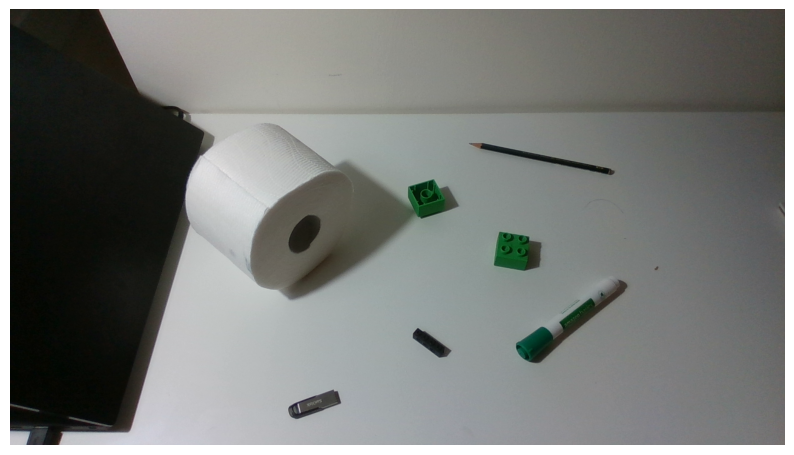

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image_path = "./../data/scene/rgb.png"

image = Image.open(image_path)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show() 

In [2]:
from trlc_sdk.http.client import HTTPClient
import io, base64

buffer = io.BytesIO()
image.convert("RGB").save(buffer, format="PNG")
image_base64 = base64.b64encode(buffer.getvalue()).decode('utf-8')

client = HTTPClient()
results = client.segment(image_base64, "brick.")

print(len(results["annotations"]))
print(results["annotations"][0].keys())

2
dict_keys(['class_name', 'bbox', 'segmentation', 'score', 'confidence'])


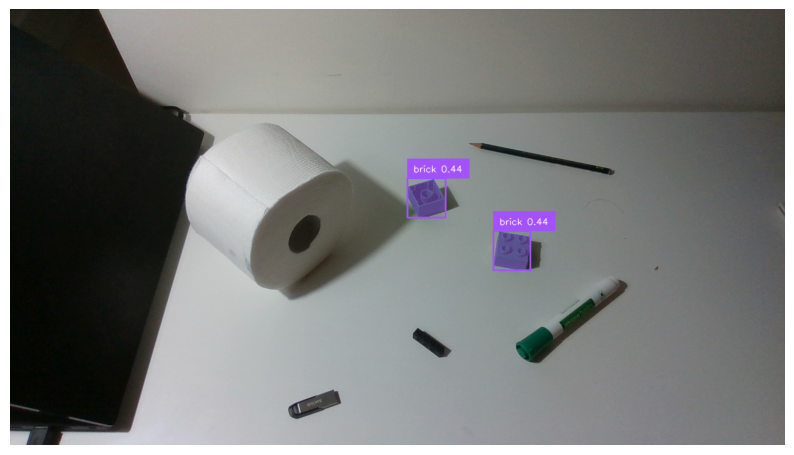

In [3]:
from trlc_sdk.utils.visualization import annotate_image

annotated_frame = annotate_image(results["annotations"], image)

plt.figure(figsize=(10, 10))
plt.imshow(annotated_frame)
plt.axis('off')
plt.show()

In [4]:
binary_mask = (results["annotations"][0]["segmentation"] > 0).astype(np.uint8) * 255
Image.fromarray(binary_mask).save('./../data/scene/mask.png')